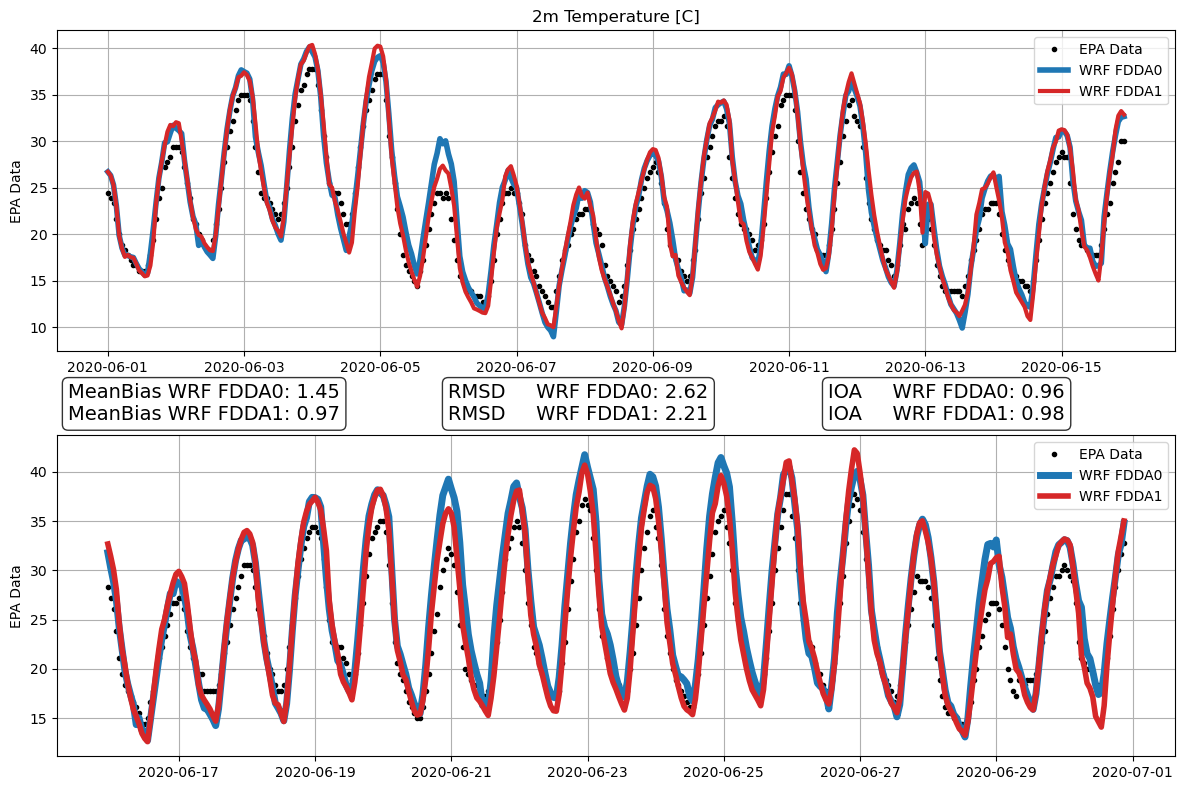

[[1.448905879179807, 0.9736055233057427], [2.619391205088341, 2.211332347151781], [0.9648516176362913, 0.975058872501645]]


In [8]:
## Loading the Libaries.
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob
from PyWRFFun import MonthTimeSeries

## Load the EPA Data Input File
EPAVar = (np.loadtxt("/data/wto/EPAMetData/hourly_TEMP_2020_06_Sac.csv", delimiter=',',usecols=[13])-32)*5/9

### Set the Variable you want to look at. ####
Var = "T2"
VarLabel = "Two-Meter Temperature [°C]"
# === Location of the EPA site===
lat_point = 38.593322
lon_point = -121.503795

## Loading the data for the whole month #############
files0 = sorted(glob("/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA0_250518/wrfout_d01_2020-06-*"))
files1 = sorted(glob("/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA1_250710/wrfout_d01_2020-06-*"))

# === Use first file to find grid location ===
sample_ds = Dataset(files0[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
Var0_all = []
Var1_all = []
Time_all = []

for ifile in range(0,len(files0)):

    Var0 = getvar(Dataset(files0[ifile]), Var, timeidx=ALL_TIMES) 
    Var0_all.extend(to_np([Var0[y_idx, x_idx] - 273.15]))
    Time_all.append(Var0.Time.values)
    
    Var1 = getvar(Dataset(files1[ifile]), Var, timeidx=ALL_TIMES) 
    Var1_all.extend(to_np([Var1[y_idx, x_idx] - 273.15]))

results = MonthTimeSeries(Time_all,[EPAVar,Var0_all,Var1_all],"2m Temperature [C]",["EPA Data","WRF FDDA0","WRF FDDA1"],Show=True)
print(results)

<class 'numpy.ndarray'>
<class 'list'>
(2, 718)
(3, 718)


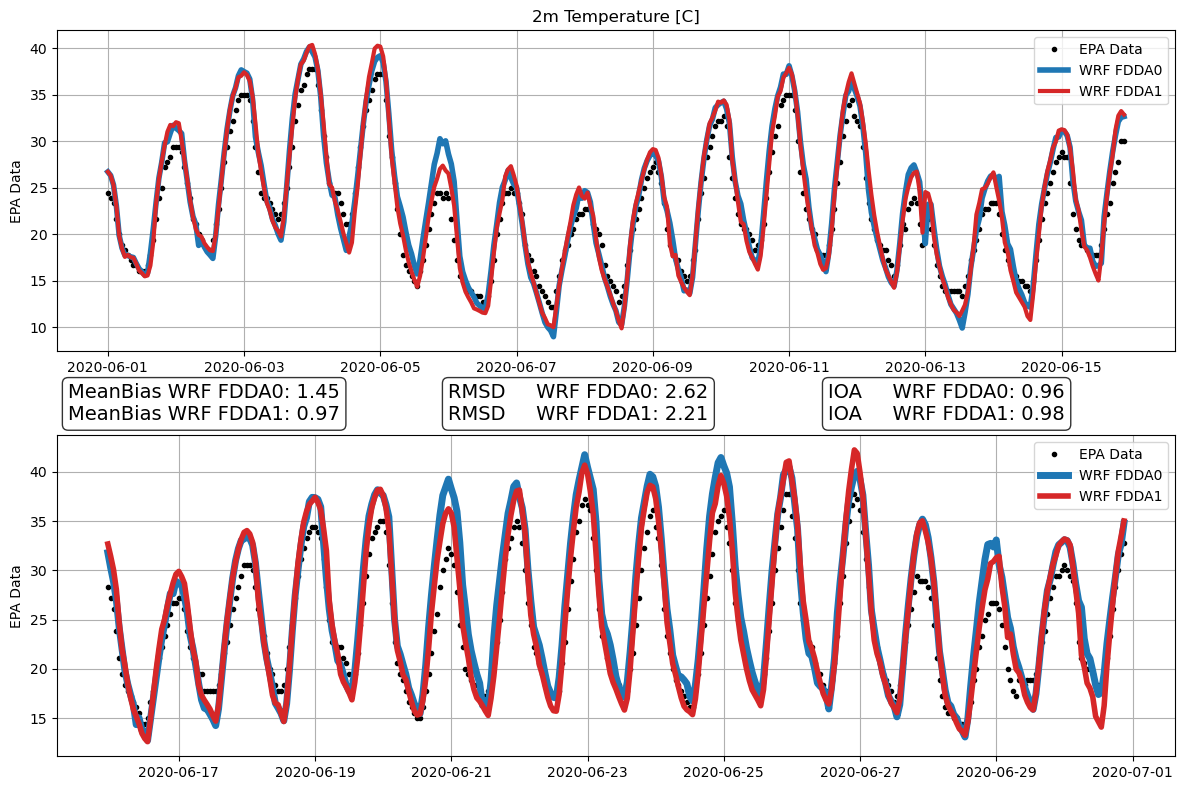

[[1.448905879179807, 0.9736055233057427], [2.619391205088341, 2.211332347151781], [0.9648516176362913, 0.975058872501645]]


In [4]:
## Loading the Libaries.
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob
from PyWRFFun import MonthTimeSeries, MonthGlob

# === Inputs ===
Var = "T2"
VarLabel = "Two-Meter Temperature [°C]"
lat_point = 38.593322
lon_point = -121.503795
## Load the EPA Data Input File
DataVal = (np.loadtxt("/data/wto/EPAMetData/hourly_TEMP_2020_06_Sac.csv", delimiter=',',usecols=[13])-32)*5/9

# === Get monthly WRF Values ===
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA0_250518/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA1_250710/wrfout_d01_2020-06-*"]
Time, Vals = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
# Concatenate the Data and WRF Values The [] around DataVal is needed to make sure it adds the array into the list.
Vals = [DataVal] + Vals
# === Call MonthTimeSeries plot function ===
results = MonthTimeSeries(Time,Vals,VarLabel, ["EPA Data","WRF FDDA0","WRF FDDA1"],Show=True)
print(results)

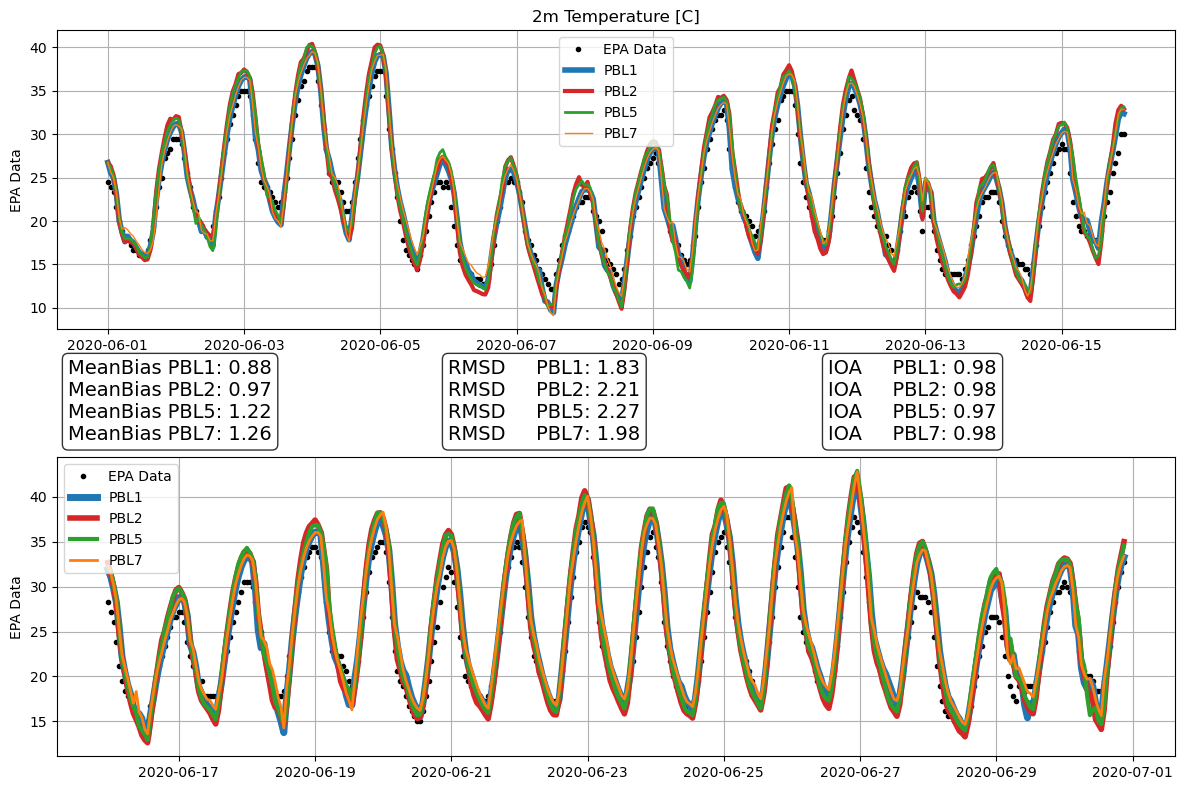

[[0.8802970931095597, 0.9736055233057427, 1.2203007416177858, 1.2556490653441743], [1.830215298414391, 2.211332347151781, 2.2657196541552294, 1.976537311002583], [0.981395677205256, 0.975058872501645, 0.973216197043207, 0.9779966579638624]]


In [7]:
## Loading the Libaries.
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob
from PyWRFFun import MonthTimeSeries, MonthGlob

# === Inputs ===
Var = "T2"
VarLabel = "Two-Meter Temperature [°C]"
lat_point = 38.593322
lon_point = -121.503795
## Load the EPA Data Input File
DataVal = (np.loadtxt("/data/wto/EPAMetData/hourly_TEMP_2020_06_Sac.csv", delimiter=',',usecols=[13])-32)*5/9

# === Get monthly WRF Values ===
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_250714/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA1_250710/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL5_FDDA1_250711/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL7_FDDA1_250715/wrfout_d01_2020-06-*"]
Time, Vals = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
# Concatenate the Data and WRF Values The [] around DataVal is needed to make sure it adds the array into the list.
Vals = [DataVal] + Vals
# === Call MonthTimeSeries plot function ===
results = MonthTimeSeries(Time,Vals,VarLabel, ["EPA Data","PBL1","PBL2","PBL5","PBL7"],Show=True)
print(results)